Import some library

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils

Import mnist data set from keras store

In [63]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

data visualization 

In [64]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

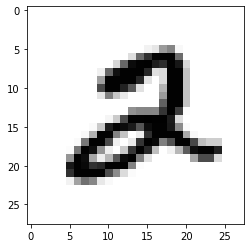

In [78]:
plt.imshow(x_train[5], cmap = 'binary')
plt.show()

In [66]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

data categorical define

In [67]:
from tensorflow.python.keras.utils.np_utils import to_categorical
#from keras.utils.np_utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [68]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [69]:
x_train.shape

(60000, 28, 28)

In [70]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

In [71]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [72]:
epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

In [73]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

print('mean: ', x_mean)
print('std: ', x_std)

mean:  33.318421449829934
std:  78.56748998339798


define Model with help of keras activation(relu, sigmoid, tanh) , softmax is use for classification purpose.

In [74]:
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

compile model optimizer we can use any one SGD, ADAM, SGD+ MOMENTUM, NAG , ADAGRAD etc 
loss we use log loss function 

In [75]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


model fit

In [76]:
h = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 5
)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5905 - accuracy: 0.8286
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1967 - accuracy: 0.9435
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1418 - accuracy: 0.9604
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1141 - accuracy: 0.9669
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0980 - accuracy: 0.9712


accuracy of model with train data

In [77]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1105 - accuracy: 0.9671
test set accuracy:  96.71000242233276


In [80]:
mode2 = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [82]:
mode2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

mode2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [83]:
h = mode2.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 5
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3514 - accuracy: 0.8926
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1014 - accuracy: 0.9679
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0673 - accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0558 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0431 - accuracy: 0.9857


In [84]:
loss, accuracy = mode2.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.9754
test set accuracy:  97.53999710083008
